# Numerical Methods

# 2019/20 Class Assessment

## Thursday 7th May 2020

## 12:00 - 15:00 (UK time: BST= GMT+1)

## Test instructions


* This test contains 5 questions with multiple parts, **all** of which should be answered.



* Write your solution in *markdown* (text and equations) and *code* (Python) cells under each question.



* [You may if you choose also submit parts of your answers via **scans of hand written pages** - feel free to use this option in particular for supplementary sketches or equations, you will not be marked down for not embedding equations into your markdown cells. But please make sure that the question number each sheet you scan refers to is very clear. Please use the Microsoft Office Lens solution you're using for exams. I suggest you also upload these scans to your Project on notebooks.azure for completeness and as a backup.]



* You should provide an explanation of your solution as comments in your code and in the surrounding markdown cells as appropriate to answer the question and explain your steps.



* Unless explicitly told otherwise in the question you can reuse any code from the lectures and homeworks, you can also use any calls to standard libraries (e.g. NumPy, SciPy).



* **Save your work regularly** ( > File > Save and Checkpoint)



* At the end of the test you should (1) **Download your Jupyter notebook** (i.e. this file with a .ipynb extension), either from within the notebook with >File>Download, or from the MyProjects page on azure by right clicking on the notebook and selecting download; (2) **email your Jupyter notebook document**  and any **scans of hand written sheets** to [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott) at <mailto:m.d.piggott@imperial.ac.uk>.



* If there are any issues during the assessment period **please document these**, e.g. via photos, and as soon as possible email <mailto:m.d.piggott@imperial.ac.uk> to report the problem.



* If your email attachments together are larger than 10Mb please use <https://fileexchange.ic.ac.uk/>

In [1]:
# you may import any libraries we used in lectures, e.g.

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
# scipy's linear algebra libary
import scipy.linalg as sl
# scipy's optimization libary
import scipy.optimize as sop

### Question 1 - interpolation [20 marks]

<br>

Consider the following data

|  x  |  y  |
|-----|-----|
| 0.0 | 0.5 |
| 0.2 | 0.4 |
| 0.5 | 0.3 |
| 0.65 | 0.5 |
| 0.8 | 0.9 |
| 1.0 | 0.8 |

<br>


**1.1 <sub>[7 marks]</sub>**

Calculate the Lagrange polynomial (a function of the $x$ variable) which passes through these points. Plot both the Lagrange polynomial and the raw data points to demonstrate that your polynomial does indeed interpolate the points. 

<br>

**1.2 <sub>[7 marks]</sub>**

<br>

Fit a $3^{rd}$ degree polynomial (cubic function) to the given data points. Plot the resulting polynomial function as well as the raw data points. Explain what measure of the misfit your curve minimises.

<br>

**1.3 <sub>[6 marks]</sub>**

Explain how you know in advance what degree of polynomial will be able to fit the data perfectly. Explain in what situation you may be able to fir the data perfectly with a lower degree polynomial.

### Answer 1

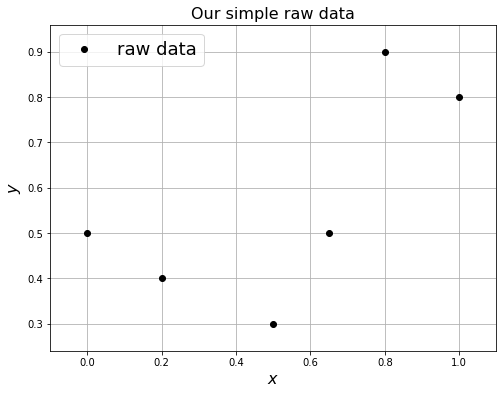

In [2]:
xi = np.array([0.0, 0.2, 0.5, 0.65, 0.8, 1.0])
yi = np.array([0.5, 0.4, 0.3, 0.5, 0.9, 0.8])

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='upper left', fontsize=18);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

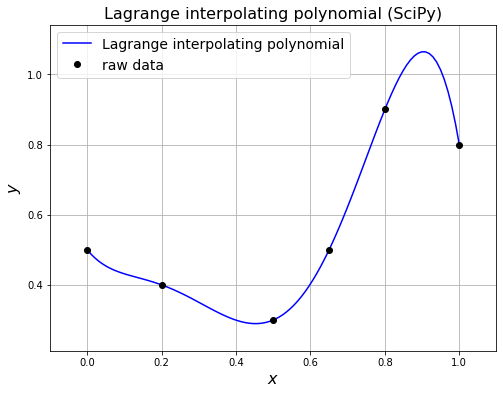

In [3]:
import scipy.interpolate as si

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# above we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0, 1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

In [4]:
# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

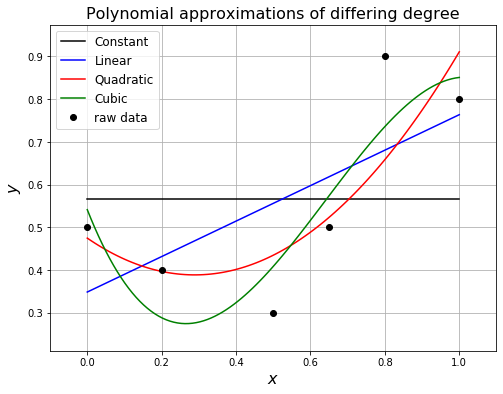

In [5]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0, 1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

In [6]:
def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()

print("Number of points to fit: ", np.size(xi))
# in this example we have 6 pieces of information, to fit a polynomial
# that exactly goes through these points we need 6 unknowns, or free 
# parameters, to choose in the polynomial.  [Too few and we won't be able
# to fit the data exaclty, and too many would just be a waste.  Cf. over-
# and under-determined systems.]
# A 5th order polynomial has 6 free parameters (all the powers up to 5,
# including 0).
# So calling polyfit to fit a polynomial of degree 5 (size(x)-1) should
# fit the data exactly (repeat below with size(x)-2 etc, and size(x) and 
# above to convince yourself of this).
# Let's check the errors up to this point:

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

# and now compute the errors
for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}'.format(i, sqr_error(p, xi, yi)))
    


Number of points to fit:  6
poly_coeffs = 
[[  0.56666667   0.           0.           0.           0.
    0.        ]
 [  0.41502683   0.34877758   0.           0.           0.
    0.        ]
 [  1.0319048   -0.59592606   0.47493517   0.           0.
    0.        ]
 [ -2.72583881   5.23843158  -2.20321255   0.5415496    0.
    0.        ]
 [-16.23915325  29.46486172 -14.26926732   1.34849819   0.49827123
    0.        ]
 [-30.335097    60.28218695 -37.74603175   9.40352734  -1.30458554
    0.5       ]]
square of the difference between the data and the polynomial of degree 0 = 2.73333333e-01
square of the difference between the data and the polynomial of degree 1 = 1.52975552e-01
square of the difference between the data and the polynomial of degree 2 = 8.99727483e-02
square of the difference between the data and the polynomial of degree 3 = 6.09705750e-02
square of the difference between the data and the polynomial of degree 4 = 2.72700548e-03
square of the difference between the dat

The standard polynomial fitting, e.g. as in polyfit, minimises the sum of the squares of the error to the data (equivalently the RMS error).

This makes sense since with 6 data points we require exactly 6 degrees of freedom in our polynomial - we have this with a degree 5 polynomial.

If the data happens to lie along a lower degree polynomial we don't need to go up this far, e.g. 3 co-linear points all lying along the same line.

### Question 2 - differentiation & ODEs [20 marks]

<br>

**2.1  <sub>[10 marks]</sub>**

Use forward and central difference methods to compute the derivative of the function 

$$f(x) = \cos(x) + x^2$$

at $x=0.75$.

Perform a convergence analysis against the exact solution with respect to $\Delta x$ for the two methods 
and comment on what you observe.

<br>

**2.2 <sub>[10 marks]</sub>**

Solve the following ODE problem

$$ \frac{dy}{dt} = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

using the forward Euler and Heun's method upto time $t=3$.

Given the exact solution
$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

perform a convergence analysis with respect to $\Delta t$ for the two methods and comment on what you observe (you can just consider the error in the solution at the final time level).


### Answer 2

Exact derivative =  0.8183612399766659
Forward differencing                    Central differencing
   1.59007 (error=      0.77)           0.926421 (error=      0.11)
   1.16727 (error=      0.35)            0.84641 (error=     0.028)
  0.984454 (error=      0.17)           0.825439 (error=    0.0071)
  0.899464 (error=     0.081)           0.820135 (error=    0.0018)
  0.858447 (error=      0.04)           0.818805 (error=   0.00044)
   0.83829 (error=      0.02)           0.818472 (error=   0.00011)
  0.828298 (error=    0.0099)           0.818389 (error=   2.8e-05)
  0.823323 (error=     0.005)           0.818368 (error=   6.9e-06)
   0.82084 (error=    0.0025)           0.818363 (error=   1.7e-06)
    0.8196 (error=    0.0012)           0.818362 (error=   4.3e-07)


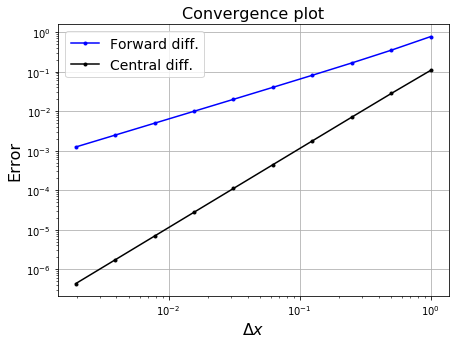

In [7]:
import math

def forward_diff(f, x, dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx


def central_diff(f, x, dx):
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)


def fun(x):
    return np.cos(x) + x**2

# for this example we know trivially what the exact solution should be
x0 = 0.75
exact = -np.sin(x0) + 2*x0


print('Exact derivative = ', exact)
# headers for the following errors outputs
print('%20s%40s' % ('Forward differencing', 'Central differencing'))

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
cd_errors = []
dx_all = []
dx = 1.0  # an initial mesh spacing
for i in range(10):
    fd = forward_diff(fun, x0, dx)
    cd = central_diff(fun, x0, dx)
    print('%10g (error=%10.2g)         %10g (error=%10.2g)' %
          (fd, abs(fd - exact), cd, abs(cd - exact)))
    # store the h and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd_errors.append(abs(cd - exact))
    dx = dx / 2  # halve h for the next iteration

# as we expect a polynomial relationship between dx and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, cd_errors, 'k.-', label='Central diff.')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

We can see from the errors, or the slopes of the lines that the error decreases linearly, quadratically respectively.

Now the ODE case.

In [8]:
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def improved_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt*f(t, u)  # euler guess
        u = u + 0.5*dt* ( f(t, u) + f(t + dt, ue) )
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

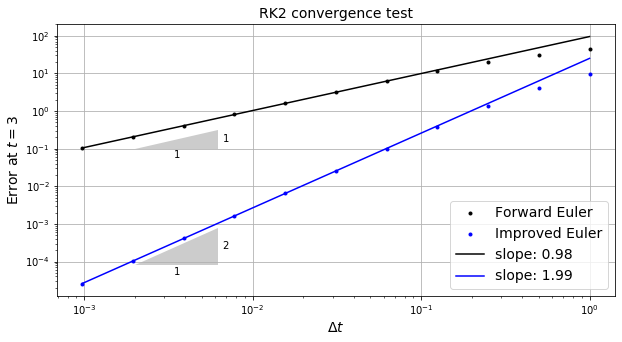

In [9]:
# Now check convergence rates (can change alpha to confirm second order convergence for all choices)

# the following allows us to plot triangles indicating convergence order
from mpltools import annotation



# problem parameters
t0 = 0.0
u0 = y_ex(t0)
t_max = 3.

def approx_error(dt, t_max):
    uall, tall = forward_euler(f, u0, t0, t_max, dt)
    err1 = abs(uall[-1] - y_ex(t_max))
    uall, tall = improved_euler(f, u0, t0, t_max, dt)
    err2 = abs(uall[-1] - y_ex(t_max))
    return err1, err2


error_fe = []
error_ie = []
dt_array = []

dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error(dt, t_max)
    error_fe.append(err1)
    error_ie.append(err2)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('RK2 convergence test', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))

annotation.slope_marker((2e-3, 1e-1), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 8e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best', fontsize=14)

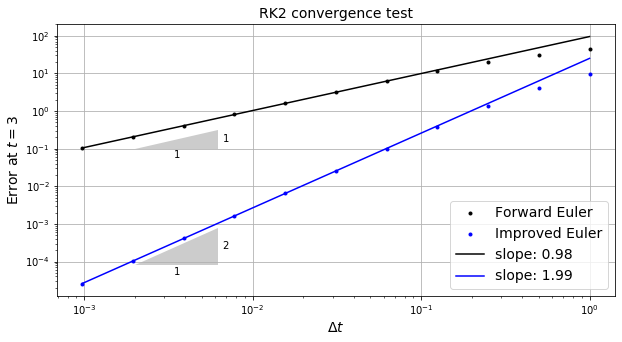

In [10]:
## nb. based on undergrad codes need to swap y,t order

def f(y, t):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + dt*f(u,t) # euler guess
        u = u + 0.5*dt*(f(u,t) + f(ue,t+dt))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)



# problem parameters
t0 = 0.0
u0 = y_ex(t0)
t_max = 3.

def approx_error(dt, t_max):
    uall, tall = euler(f, u0, t0, t_max, dt)
    err1 = abs(uall[-1] - y_ex(t_max))
    uall, tall = heun(f, u0, t0, t_max, dt)
    err2 = abs(uall[-1] - y_ex(t_max))
    return err1, err2


error_fe = []
error_ie = []
dt_array = []

dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error(dt, t_max)
    error_fe.append(err1)
    error_ie.append(err2)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('RK2 convergence test', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))

annotation.slope_marker((2e-3, 1e-1), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 8e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best', fontsize=14)

This shows that the euler method is first order while Heun's method is second order accurate.

### Question 3 - integration/quadrature

<br>

**3.1 <sub>[8 marks]</sub>**

Implement functions for the Trapezoidal integration/quadrature rule, and the composite form of the Trapezoidal rule.

<br>

**3.2  <sub>[8 marks]</sub>**

Verify your implementations by calculating 

$$\int_0^\pi \, \sin(x) \, dx$$

<br>

**3.3  <sub>[4 marks]</sub>**

Explain why it might be important to use the composite version of the rule.

### Answer 3

In [2]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version.
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T

The exact area found by direct integration = 2
Area 1    rectangle(s) = 0.000000000 (error = 2.000000000e+00)
Area 2    rectangle(s) = 1.570796327 (error = 4.292036732e-01)
Area 4    rectangle(s) = 1.896118898 (error = 1.038811021e-01)
Area 8    rectangle(s) = 1.974231602 (error = 2.576839805e-02)
Area 16   rectangle(s) = 1.993570344 (error = 6.429656228e-03)
Area 32   rectangle(s) = 1.998393361 (error = 1.606639030e-03)
Area 100  rectangle(s) = 1.999835504 (error = 1.644961126e-04)
Area 1000 rectangle(s) = 1.999998355 (error = 1.644934338e-06)


Text(0.5, 1.0, 'Convergence plot when integrating $\\sin$ with the Trapezoidal rule')

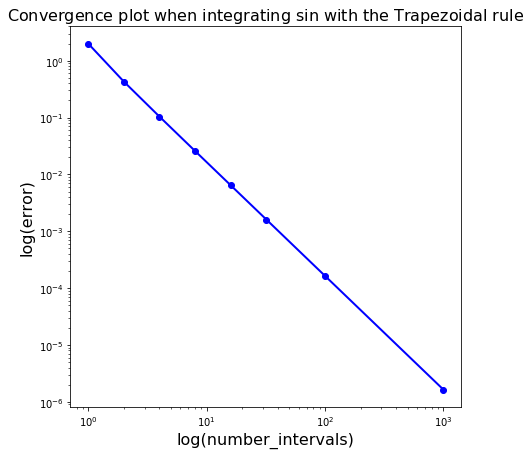

In [3]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the midpoint function.
print('The exact area found by direct integration = 2')

# create a list of interval sizes to test 
interval_sizes_T = [1, 2, 4, 8, 16, 32, 100, 1000]

# initialise an array to store the errors
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')

# loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_T):
    area = trapezoidal_rule(0, np.pi, f, number_intervals)
    errors_T[i] = abs(area-2)
    print('Area {:<4d} rectangle(s) = {:.9f} (error = {:.9e})'.format(
        number_intervals, area, errors_T[i]))

# plot how the errors vary with interval size
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with the Trapezoidal rule', fontsize=16)


In [4]:
# implement the composite form of the trap rule
def trapezoidal_rule2(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule - composite version"""
    interval_size = (b - a)/number_intervals
    assert interval_size > 0
    assert type(number_intervals) == int
    I_T = 0.0
    # Use the composite form of the rule
    # note that with some thought we can minimise the multiplications by 2, as well as by
    # the interval_size:
    I_T += function(a)/2.0
    for i in range(1, number_intervals):
        I_T += function(a + i * interval_size)
    I_T += function(b)/2.0
    # Return our running total result
    return I_T * interval_size

In [5]:
# Now let's test our two simpson rule functions.

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# here we just print the two intergal approximations and compare using the
# "eyeball" norm - ideally you would use something like np.allclose.
print('\nVerificaton check: \n')
interval_sizes = [1, 2, 4, 8, 16, 32, 100, 1000]
for (i, number_intervals) in enumerate(interval_sizes):
    print('{0:.16f}, {1:.16e}'.format(trapezoidal_rule(0, np.pi, f, number_intervals),\
                                      trapezoidal_rule2(0, np.pi, f, number_intervals)))
    
# of course you could use numpy.allclose, and you should also test on other equations, e.g.:

print('\nTest on x^2 with 10 intervals:',np.allclose(  trapezoidal_rule(0., 1., lambda x : x**2, 10),\
                    trapezoidal_rule2(0., 1., lambda x : x**2, 10)) )

print('\nTest on exp with 100 intervals:',np.allclose(  trapezoidal_rule(1., 3., np.exp, 100),\
                    trapezoidal_rule2(1., 3., np.exp, 100)) )


Verificaton check: 

0.0000000000000002, 1.9236706937217898e-16
1.5707963267948968, 1.5707963267948966e+00
1.8961188979370398, 1.8961188979370398e+00
1.9742316019455510, 1.9742316019455508e+00
1.9935703437723391, 1.9935703437723395e+00
1.9983933609701445, 1.9983933609701441e+00
1.9998355038874440, 1.9998355038874436e+00
1.9999983550656619, 1.9999983550656624e+00

Test on x^2 with 10 intervals: True

Test on exp with 100 intervals: True


### Question 4 - root-finding

<br>

**4.1 <sub>[8 marks]</sub>**

Starting from the `newton` function from lecture 4, generalise the code so that a single function implements the
Newton, Quasi-Newton and Secant methods, which can be selected through the use of appropriate function arguments. 

<br>

**4.2  <sub>[6 marks]</sub>**

Test your methods by finding the roots of the functions

$$f(x) = x - \mathrm{e}^{-x}$$

and

$$ f(x) = 2\,x + x \, \sin(x-3) - 5$$

<br> 

**4.3 <sub>[6 marks]</sub>**

Now consider the following function

$$f(x) = x\sin(\pi x)-\exp(-x)$$

Plot its behaviour and explain (e.g. in text and through sketches) why you need to be careful with your initial guess at if you wanted to find the smallest root. 

Through different choices of initial guess, demonstrate the behaviour you describe via the roots that your function converges to.

### Answer 4

In [6]:
def newton2(f, x0, method = 'numdif', atol=1.0e-6, maxiter = 100, slope = None, dx=1.0e-4, x1=0.):
    """ Function which implements Newton, Quasi-Newton and Secant
    depending on method.
    
    If method == "newton" then slope needs to point to a function containing
    the derivative.
    
    If method == "numdif" then dx is the step size in the finite difference
    approximation to the derviative.
    
    If method == "secant" then another guess is needed - x1
    """
    assert method in ("newton", "numdif", "secant")
    
    if method == 'secant':
            x = [x0, x1]
    else:
            x = [x0]
    it = 0
    while True:
        # approximate gradient
        if method == 'newton':
            m = 1./slope(x[-1])
        elif method == 'numdif':
            m = 1./( (f(x[-1]+dx) - f(x[-1])) / dx )
        else: # must be secant
            m = 1./( (f(x[-1])-f(x[-2])) / (x[-1]-x[-2]) )
        # update
        x.append( x[-1] - m * f(x[-1]) )
        if abs(x[-1]-x[-2]) < atol:
            return x[-1], it
        it += 1
        if it >= maxiter:
            print('hit max its without converging')
            break

SciPy: 0.567143290409784
newton2 (method = newton):  (0.5671432904097811, 3)
newton2 (method = numdif):  (0.5671432904117697, 3)
newton2 (method = secant):  (0.5671432904093786, 4)


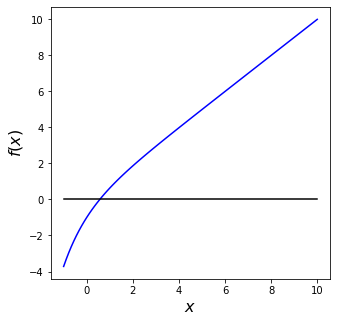

In [7]:
# case 1
def f(x):
    return x - np.exp(-x)


def dfdx(x):
    return 1 + np.exp(-x)

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
x = np.linspace(-1,10,100)
ax1.plot(x, f(x), 'b')
ax1.plot(x, x*0, 'k', label='$y = x$')
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)

x0 = 0.  # initial guess
print('SciPy:', sop.newton(f, x0, dfdx))
print('newton2 (method = newton): ', newton2(f, x0, method = 'newton', slope = dfdx))
print("newton2 (method = numdif): ", newton2(f, x0))
x1 = x0+0.1
print("newton2 (method = secant): ", newton2(f, x0, method = 'secant', x1=x1))

SciPy: 2.7903546180673837
newton2 (method = newton):  (2.7903546180673837, 4)
newton2 (method = numdif):  (2.790354618067386, 4)
newton2 (method = secant):  (2.7903546180673446, 5)


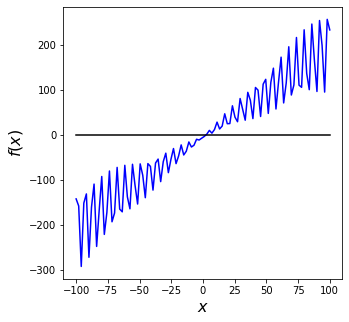

In [8]:
def f(x):
    return 2*x + x*np.sin(x-3) - 5


def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
x = np.linspace(-100,100,100)
ax1.plot(x, f(x), 'b')
ax1.plot(x, x*0, 'k', label='$y = x$')
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)

x0 = 0.  # initial guess
print('SciPy:', sop.newton(f, x0, dfdx))
print('newton2 (method = newton): ', newton2(f, x0, method = 'newton', slope = dfdx))
print("newton2 (method = numdif): ", newton2(f, x0))
x1 = x0+0.1
print("newton2 (method = secant): ", newton2(f, x0, method = 'secant', x1=x1))

SciPy: 0.5782625797567086
newton2 (method = newton):  (0.5782626243909459, 8)
newton2 (method = numdif):  (0.5782625780524511, 3)
newton2 (method = secant):  (0.5782625777631311, 4)


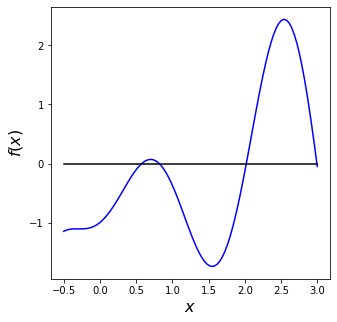

In [9]:
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)


fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
x = np.linspace(-0.5,3,100)
ax1.plot(x, f(x), 'b')
ax1.plot(x, x*0, 'k', label='$y = x$')
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)


x0 = 0.5  # initial guess
print('SciPy:', sop.newton(f, x0, dfdx))
print('newton2 (method = newton): ', newton2(f, x0, method = 'newton', slope = dfdx))
print("newton2 (method = numdif): ", newton2(f, x0))
x1 = x0+0.01
print("newton2 (method = secant): ", newton2(f, x0, method = 'secant', x1=x1))

The problem is that if you start near a point where the gradient doesn't take you in the direction of the root you want, then you will head off in the direction of finding one of the larger roots.

Plotting the function shows the issue will likely occur when intial guess around -0.2

Text(0, 0.5, '$f(x)$')

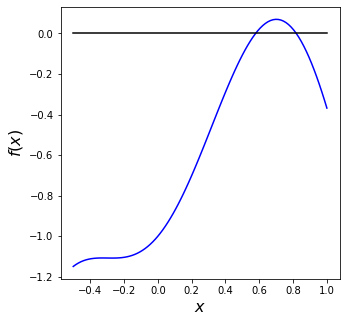

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
x = np.linspace(-0.5,1,100)
ax1.plot(x, f(x), 'b')
ax1.plot(x, x*0, 'k', label='$y = x$')
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)

In [11]:
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)


def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)



x0 = 0.3  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

x0 = 0.2  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

x0 = 0.1  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

x0 = 0.0  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

x0 = -0.1  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

x0 = -0.2  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

x0 = -0.5  # initial guess
print('SciPy:', sop.newton(f, x0))
print('newton2 (method = newton): ', newton2(f, x0))

SciPy: 0.5782625778645155
newton2 (method = newton):  (0.5782625778615974, 4)
SciPy: 0.5782625778644932
newton2 (method = newton):  (0.5782625780644868, 3)
SciPy: 0.578262577864515
newton2 (method = newton):  (0.5782625778615671, 6)
SciPy: 0.8191177934425945
newton2 (method = newton):  (0.8191177935415258, 5)
SciPy: 2.020890907771352
newton2 (method = newton):  (2.020890907773421, 3)
SciPy: 0.8191177934426799
newton2 (method = newton):  (10.000001445122352, 6)
SciPy: 1.2693999707382557
newton2 (method = newton):  (0.8191177936069522, 5)


### Question 5 - numerical linear algebra

<br>

Consider the following set of linear equations

\begin{align*}
  x + 2y + 4z &= -20 \\
  2x + 5y + 6z &= -36 \\
  -x - 5y + 3z &= 26
\end{align*}

<br>

**5.1  <sub>[7 marks]</sub>**

Write this in matrix form, form the corresponding augmented system and perform row operations until you get to upper-triangular form, find the solution using back substitution (**do this all with pen and paper**).

Check your answer using any method available to you to solve this problem in SciPy of NumPy.

<br>

**5.2  <sub>[5 marks]</sub>**

Assuming we have performed an LU decomposition on the matrix, 
explain mathematically how we can then trivially solve this linear system using
forward and backward substitution.

<br>

**5.3  <sub>[8 marks]</sub>**

Write some code/functions which take a matrix $A$ and RHS vector  $\pmb{b}$ and returns the solution
using LU decomposition (e.g. with the call format `x = LU_solve(A, b)`). Test on the above problem.



### Answer 5

### Gaussian elimination steps


$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & 4 & -20 \\
    2 & 5 & 6 & -36 \\
    -1 & -5 & 3 & 26\\    
  \end{array}
\right]
$$

Eliminate first column below pivot:

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & 4 & -20 \\
    0 & 1 & -2 & 4 \\
    0 & -3 & 7 & 6\\    
  \end{array}
\right]
$$

and second

$$
\left[
  \begin{array}{rrr|r}
    1 & 2 & 4 & -20 \\
    0 & 1 & -2 & 4 \\
    0 & 0 & 1 & 18\\    
  \end{array}
\right]
$$

So $z=18$, $y = 4+2z=4+2 \times 18 = 40$, $x = ... = -172$

### Using an LU decomposition to solve a linear matrix system

Mathematically, let's assume that we have already found/constructed a lower-triangular matrix ($L$ - where all entries above the diagonal are zero) and an upper-triangular matrix ($U$ - where all entries below the diagonal are zero) such that we can write

$$ A = LU. $$

In this case the matrix system we need to solve for $\boldsymbol{x}$ becomes

$$ A\boldsymbol{x} = \boldsymbol{b} \iff (LU)\boldsymbol{x} = L(U\boldsymbol{x}) = \boldsymbol{b}. $$

Notice that the matrix-vector product $U\boldsymbol{x}$ is itself a vector, let's call it $\boldsymbol{c}$ for the time-being (i.e. 
$\boldsymbol{c}:=U\boldsymbol{x}$).

The above system then reads 

$$ L\boldsymbol{c} = \boldsymbol{b}, $$

where $L$ is a matrix and $\boldsymbol{c}$ is an unknown.  

As $L$ is in lower-triangular form we can use forward substitution (generalising the back subsitution algorithm/code we developed above) to very easily find $\boldsymbol{c}$ in relatively few operations (we don't need to call the entire Gaussian elimination algorithm).

Once we have found $\boldsymbol{c}$ we then solve the second linear system 

$$ U\boldsymbol{x} = \boldsymbol{c}, $$

where now we can use the fact that $U$ is upper-triangular to use our back substitution algorithm, again very efficiently, to give the solution $\boldsymbol{x}$ we require.

So for a given $\boldsymbol{b}$ we can find the corresponding $\boldsymbol{x}$ very efficiently as long as we know $L$ and $U$. We can therefore do this repeatedly as each new $\boldsymbol{b}$ is given to us.

Our challenge is therefore to find the matrices $L$ and $U$ allowing us to perform the decomposition $A = LU$.

In [12]:
def back_substitution(A, b):
    """ Function to perform back subsitution on the system Ax=b.
    
    Returns the solution x.
    
    Assumes that A is on upper triangular form.
    """
    n = np.size(b)
    # Check A is square and its number of rows and columns same as size of the vector b
    rows, cols = np.shape(A)
    assert(rows == cols)
    assert(rows == n)
    # We can/should check that A is upper triangular using np.triu which is the 
    # upper triangular part of a matrix - if A is already upper triangular, then
    # it should of course match the upper-triangular component of A!!
    assert(np.allclose(A, np.triu(A)))
    
    x = np.zeros(n)
    # start at the end (row n-1) and work backwards
    for k in range(n-1, -1, -1):
        # note that we could do this update in a single vectorised line 
        # using np.dot or @ - this could also speed things up
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]

    return x


def backward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]    
    return x

In [13]:
# This version of the solution does not use partial pivoting 
# and hence doesn't need to deal with a P matrix

def LU_decomposition(A):
    # construct upper triangular matrix contains Gaussian elimination result
    # we won't change A in-place but create a local copy
    # if we don't do this then A will be over-written by the U we
    # compute and return
    A = A.copy()
    m, n = A.shape
    assert(m == n)
    # For simplicity we set up a matrix to store L, but note the comment above
    # that if we had memory concerns we would reuse zeroed entries in A.
    # We don't initialise this to the identity now, as this won't be correct
    # when we use partial pivoting a little later.
    L = np.zeros((n,n))
    # Loop over each pivot row - don't need to consider the final row as a pivot
    for k in range(n-1):
        # Loop over each equation below the pivot row - now we do need to consider the last row
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed.
            s = (A[i, k] / A[k, k])
            for j in range(k, n):
                A[i, j] = A[i, j] - s*A[k, j]
            # store the scaling factors which make up the lower tri matrix
            L[i, k] = s
    # remember to add in the ones on the main diagonal to L
    L += np.eye(m)
    # A now is the upper triangular matrix U 
    return L, A

# This function assumes that A is already an upper triangular matrix.
def backward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]    
    return x

# This function assumes that A is already a lower triangular matrix.
def forward_substitution(A, b):
    n = np.size(b)    
    x = np.zeros(n)
    for k in range(n):
        s = 0.
        for j in range(k):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
    
    return x

def LU_solve(A, b):
    """ An LU solve function that makes use of our
    non partial pivoting versions of LU_decomposition
    followed by forward_substitution and
    backward_substitution
    """ 
    L, U = LU_decomposition(A)
    print('L=',L)
    print('U=',U)
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)
    return x


A = np.array([[1., 2., 4.], 
              [2., 5., 6.],
              [-1., -5., 3.]])
b = np.array([-20., -36., 26.])

x = LU_solve(A, b)
print('x=',x)
# Always check that our implementation produces the right result
print(np.allclose(np.linalg.solve(A, b), LU_solve(A, b)))

L= [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -3.  1.]]
U= [[ 1.  2.  4.]
 [ 0.  1. -2.]
 [ 0.  0.  1.]]
x= [-172.   40.   18.]
L= [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -3.  1.]]
U= [[ 1.  2.  4.]
 [ 0.  1. -2.]
 [ 0.  0.  1.]]
True


Note that U here is the same as we derived by hand